<a href="https://colab.research.google.com/github/shreya2277/TextUtils-React/blob/master/MLproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
file_path = 'manufacturing_defect_dataset.csv'

df = pd.read_csv(file_path)

df.head()


,ProductionVolume,ProductionCost,SupplierQuality,DeliveryDelay,DefectRate,QualityScore,MaintenanceHours,DowntimePercentage,InventoryTurnover,StockoutRate,WorkerProductivity,SafetyIncidents,EnergyConsumption,EnergyEfficiency,AdditiveProcessTime,AdditiveMaterialCost,DefectStatus
0,202,13175.403783,86.648534,1,3.121492,63.463494,9,0.052343,8.630515,0.081322,85.042379,0,2419.616785,0.468947,5.551639,236.439301,1
1,535,19770.046093,86.310664,4,0.819531,83.697818,20,4.908328,9.296598,0.038486,99.657443,7,3915.566713,0.119485,9.080754,353.957631,1
2,960,19060.820997,82.132472,0,4.514504,90.350550,1,2.464923,5.097486,0.002887,92.819264,2,3392.385362,0.496392,6.562827,396.189402,1
3,370,5647.606037,87.335966,5,0.638524,67.628690,8,4.692476,3.577616,0.055331,96.887013,8,4652.400275,0.183125,8.097496,164.135870,1
4,206,7472.222236,81.989893,3,3.867784,82.728334,9,2.746726,6.851709,0.068047,88.315554,7,1581.630332,0.263507,6.406154,365.708964,1


In [ ]:
#DATA ANALYSIS
# Strip any leading/trailing spaces and convert to lowercase
df.columns = df.columns.str.strip().str.lower()

print(df.columns)

Index(['productionvolume', 'productioncost', 'supplierquality',
       'deliverydelay', 'defectrate', 'qualityscore', 'maintenancehours',
       'downtimepercentage', 'inventoryturnover', 'stockoutrate',
       'workerproductivity', 'safetyincidents', 'energyconsumption',
       'energyefficiency', 'additiveprocesstime', 'additivematerialcost',
       'defectstatus'],
      dtype='object')


In [ ]:
# Handle missing values
df.fillna(method='ffill', inplace=True)

# Remove duplicates if any
df.drop_duplicates(inplace=True)

In [ ]:
df.nunique()


productionvolume         862
productioncost          3240
supplierquality         3240
deliverydelay              6
defectrate              3240
qualityscore            3240
maintenancehours          24
downtimepercentage      3240
inventoryturnover       3240
stockoutrate            3240
workerproductivity      3240
safetyincidents           10
energyconsumption       3240
energyefficiency        3240
additiveprocesstime     3240
additivematerialcost    3240
defectstatus               2
dtype: int64

In [ ]:

df.dtypes

productionvolume          int64
productioncost          float64
supplierquality         float64
deliverydelay             int64
defectrate              float64
qualityscore            float64
maintenancehours          int64
downtimepercentage      float64
inventoryturnover       float64
stockoutrate            float64
workerproductivity      float64
safetyincidents           int64
energyconsumption       float64
energyefficiency        float64
additiveprocesstime     float64
additivematerialcost    float64
defectstatus              int64
dtype: object

In [ ]:
print("Information about the data:")
df.info()

Information about the data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3240 entries, 0 to 3239
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   productionvolume      3240 non-null   int64  
 1   productioncost        3240 non-null   float64
 2   supplierquality       3240 non-null   float64
 3   deliverydelay         3240 non-null   int64  
 4   defectrate            3240 non-null   float64
 5   qualityscore          3240 non-null   float64
 6   maintenancehours      3240 non-null   int64  
 7   downtimepercentage    3240 non-null   float64
 8   inventoryturnover     3240 non-null   float64
 9   stockoutrate          3240 non-null   float64
 10  workerproductivity    3240 non-null   float64
 11  safetyincidents       3240 non-null   int64  
 12  energyconsumption     3240 non-null   float64
 13  energyefficiency      3240 non-null   float64
 14  additiveprocesstime   3240 non-null   float6

In [ ]:
# Summary statistics
print("Statistics of the data:")
print(df.describe())

Statistics of the data:
       productionvolume  productioncost  supplierquality  deliverydelay  \
count       3240.000000     3240.000000      3240.000000    3240.000000   
mean         548.523148    12423.018476        89.833290       2.558951   
std          262.402073     4308.051904         5.759143       1.705804   
min          100.000000     5000.174521        80.004820       0.000000   
25%          322.000000     8728.829280        84.869219       1.000000   
50%          549.000000    12405.204656        89.704861       3.000000   
75%          775.250000    16124.462428        94.789936       4.000000   
max          999.000000    19993.365549        99.989214       5.000000   

        defectrate  qualityscore  maintenancehours  downtimepercentage  \
count  3240.000000   3240.000000       3240.000000         3240.000000   
mean      2.749116     80.134272         11.476543            2.501373   
std       1.310154     11.611750          6.872684            1.443684   
min 

Index(['productionvolume', 'productioncost', 'supplierquality',
       'deliverydelay', 'defectrate', 'qualityscore', 'maintenancehours',
       'downtimepercentage', 'inventoryturnover', 'stockoutrate',
       'workerproductivity', 'safetyincidents', 'energyconsumption',
       'energyefficiency', 'additiveprocesstime', 'additivematerialcost',
       'defectstatus'],
      dtype='object')


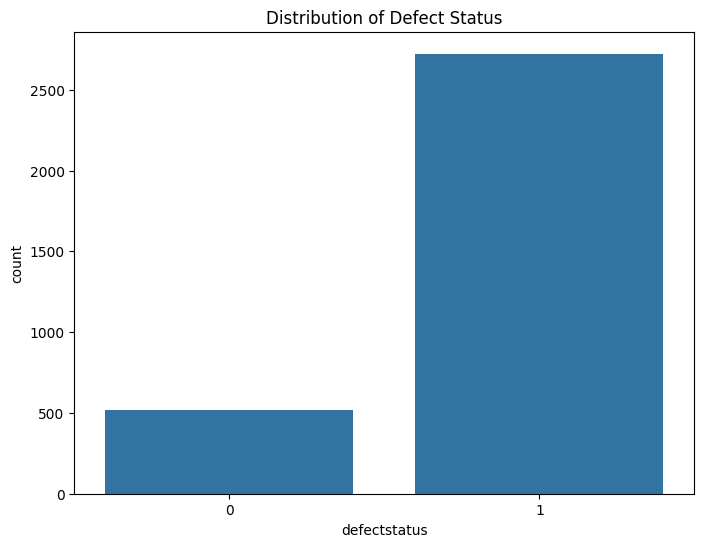

In [ ]:
#EDA
# Distribution of Defect Status
plt.figure(figsize=(8, 6))
print(df.columns)
sns.countplot(x='defectstatus', data=df)
plt.title('Distribution of Defect Status')
plt.show()

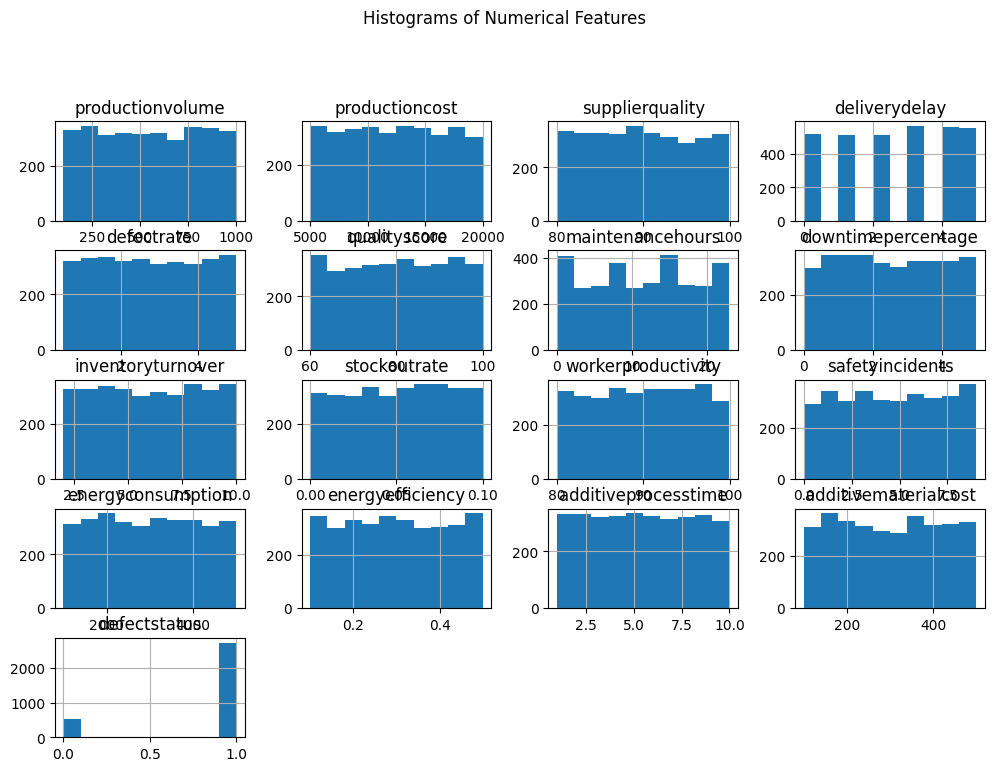

In [ ]:
# Histograms for numerical features
numerical_features = ['productionvolume', 'productioncost', 'supplierquality',
       'deliverydelay', 'defectrate', 'qualityscore', 'maintenancehours',
       'downtimepercentage', 'inventoryturnover', 'stockoutrate',
       'workerproductivity', 'safetyincidents', 'energyconsumption',
       'energyefficiency', 'additiveprocesstime', 'additivematerialcost',
       'defectstatus']

# Select only the columns that are actually present in your DataFrame
available_numerical_features = [col for col in numerical_features if col in df.columns]

# Plot histograms for the available numerical features
df[available_numerical_features].hist(figsize=(12, 8))
plt.suptitle('Histograms of Numerical Features', y=1.02)
plt.show()

In [ ]:
# Outlier detection using IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print("Number of outliers in each feature:\n", outliers)

# Removing outliers
clean_df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Shape of the DataFrame before removing outliers:", df.shape)
print("Shape of the DataFrame after removing outliers:", clean_df.shape)


Number of outliers in each feature:
 ProductionVolume          0
ProductionCost            0
SupplierQuality           0
DeliveryDelay             0
DefectRate                0
QualityScore              0
MaintenanceHours          0
DowntimePercentage        0
InventoryTurnover         0
StockoutRate              0
WorkerProductivity        0
SafetyIncidents           0
EnergyConsumption         0
EnergyEfficiency          0
AdditiveProcessTime       0
AdditiveMaterialCost      0
DefectStatus            517
dtype: int64
Shape of the DataFrame before removing outliers: (3240, 17)
Shape of the DataFrame after removing outliers: (2723, 17)


In [ ]:
# Check for missing values
print("Missing values before handling:\n", clean_df.isnull().sum())

# Remove rows with missing values (if any)
clean_df.dropna(inplace=True)

# Print the cleaned DataFrame
print(clean_df)


Missing values before handling:
 ProductionVolume        0
ProductionCost          0
SupplierQuality         0
DeliveryDelay           0
DefectRate              0
QualityScore            0
MaintenanceHours        0
DowntimePercentage      0
InventoryTurnover       0
StockoutRate            0
WorkerProductivity      0
SafetyIncidents         0
EnergyConsumption       0
EnergyEfficiency        0
AdditiveProcessTime     0
AdditiveMaterialCost    0
DefectStatus            0
dtype: int64
      ProductionVolume  ProductionCost  SupplierQuality  DeliveryDelay  \
0                  202    13175.403783        86.648534              1   
1                  535    19770.046093        86.310664              4   
2                  960    19060.820997        82.132472              0   
3                  370     5647.606037        87.335966              5   
4                  206     7472.222236        81.989893              3   
...                ...             ...              ...            .

Classification Report
               precision    recall  f1-score   support

           0       0.93      0.77      0.84       102
           1       0.96      0.99      0.97       546

    accuracy                           0.96       648
   macro avg       0.94      0.88      0.91       648
weighted avg       0.95      0.96      0.95       648

Accuracy: 0.9552469135802469


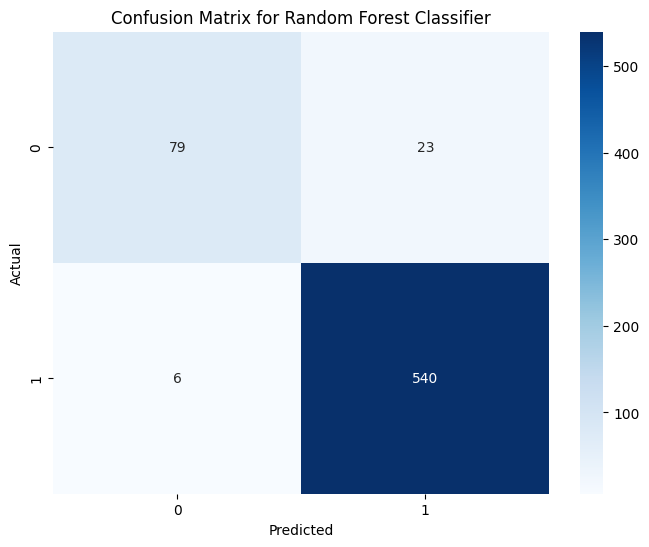

In [ ]:

#RANDOM FOREST CLASSIFIER MODEL


# defectstatus is the target variable
X = df.drop('DefectStatus', axis=1)
y = df['DefectStatus']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluation
print("Classification Report\n",classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

#confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



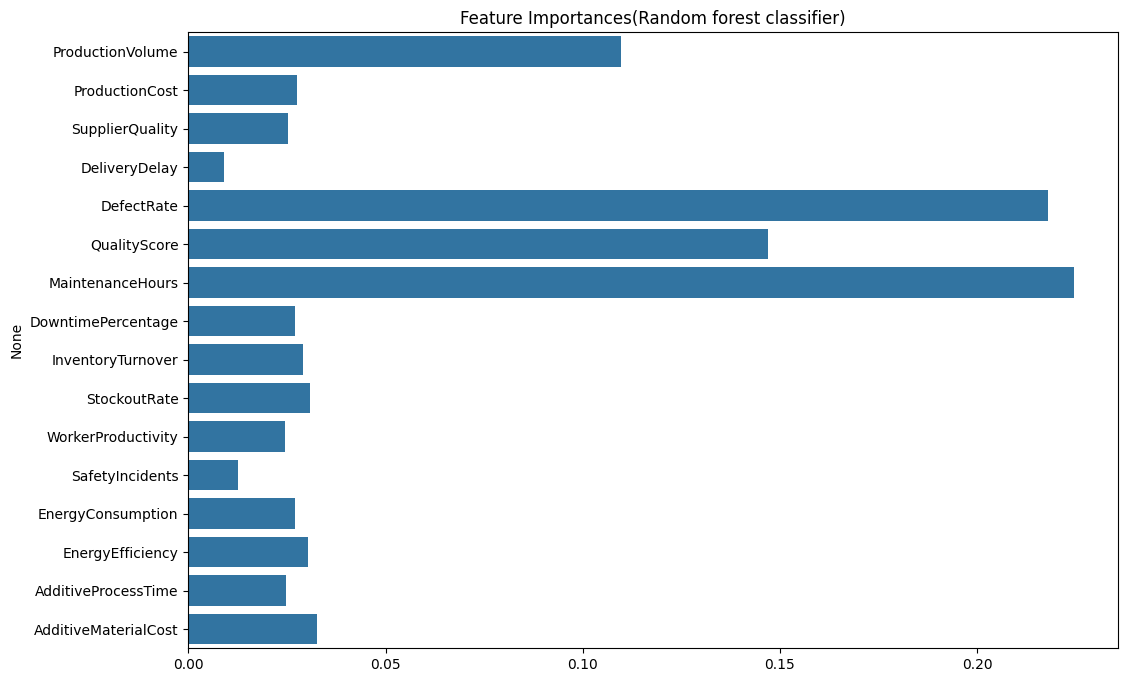

In [ ]:
# extract feature importances
from sklearn.ensemble import RandomForestClassifier

# Example model for feature importance
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
features = X_train.columns

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x=importances, y=features)
plt.title('Feature Importances(Random forest classifier)')
plt.show()

classification report:
               precision    recall  f1-score   support

           0       0.61      0.22      0.32       102
           1       0.87      0.97      0.92       546

    accuracy                           0.85       648
   macro avg       0.74      0.60      0.62       648
weighted avg       0.83      0.85      0.82       648

Accuracy: 0.8549382716049383


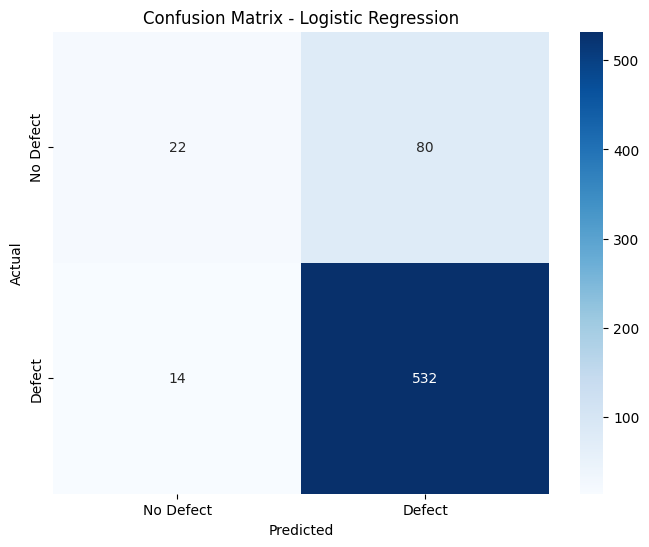

In [ ]:
#LOGISTIC REGRESSION
import warnings
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

X = df.drop('DefectStatus', axis=1)
y = df['DefectStatus']

# Convert categorical features to numerical using one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a LogisticRegression model
logreg = LogisticRegression()

# Train the model
logreg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Evaluation
print("classification report:\n",classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Defect', 'Defect'], yticklabels=['No Defect', 'Defect'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()



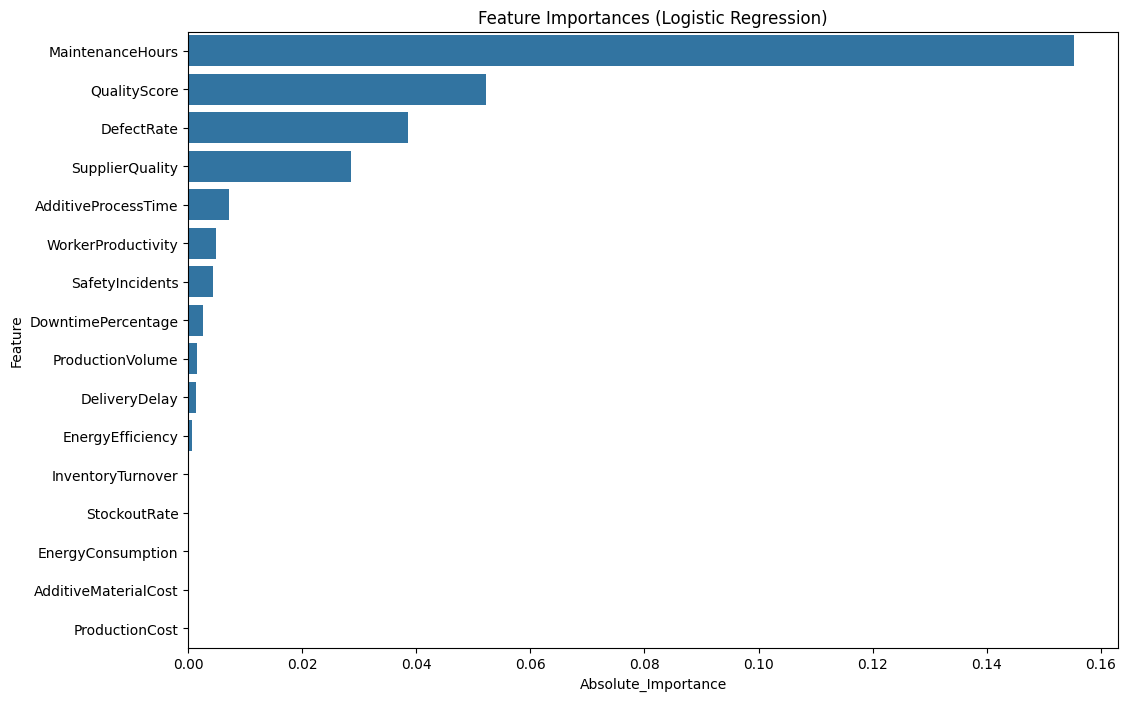

In [ ]:
# Get coefficients from the logistic regression model
coefficients = logreg.coef_[0]

# Get feature names
feature_names = X_train.columns

# Create a DataFrame for easier plotting
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': coefficients})

# Sort the DataFrame by absolute importance
feature_importance_df['Absolute_Importance'] = abs(feature_importance_df['Importance'])
feature_importance_df = feature_importance_df.sort_values('Absolute_Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Absolute_Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances (Logistic Regression)')
plt.show()


Classification Report (Gradient Boosting):
               precision    recall  f1-score   support

           0       0.92      0.76      0.83       102
           1       0.96      0.99      0.97       546

    accuracy                           0.95       648
   macro avg       0.94      0.88      0.90       648
weighted avg       0.95      0.95      0.95       648

Accuracy (Gradient Boosting): 0.9521604938271605


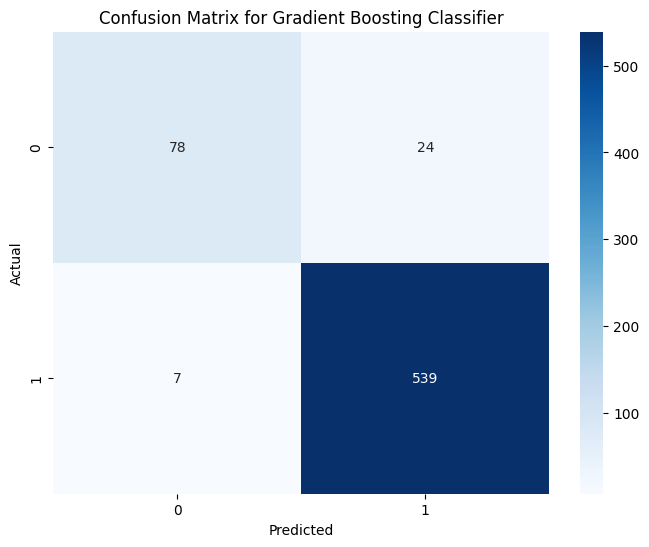

In [ ]:
#GRADIENT BOOSTING

from sklearn.ensemble import GradientBoostingClassifier

# Assuming X_train, X_test, y_train, y_test are already defined from previous code

# Create a GradientBoostingClassifier model
gb_classifier = GradientBoostingClassifier(random_state=42)

# Train the model
gb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb_classifier.predict(X_test)

# Evaluation
print("Classification Report (Gradient Boosting):\n", classification_report(y_test, y_pred))
print("Accuracy (Gradient Boosting):", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm_gb = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_gb, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Gradient Boosting Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



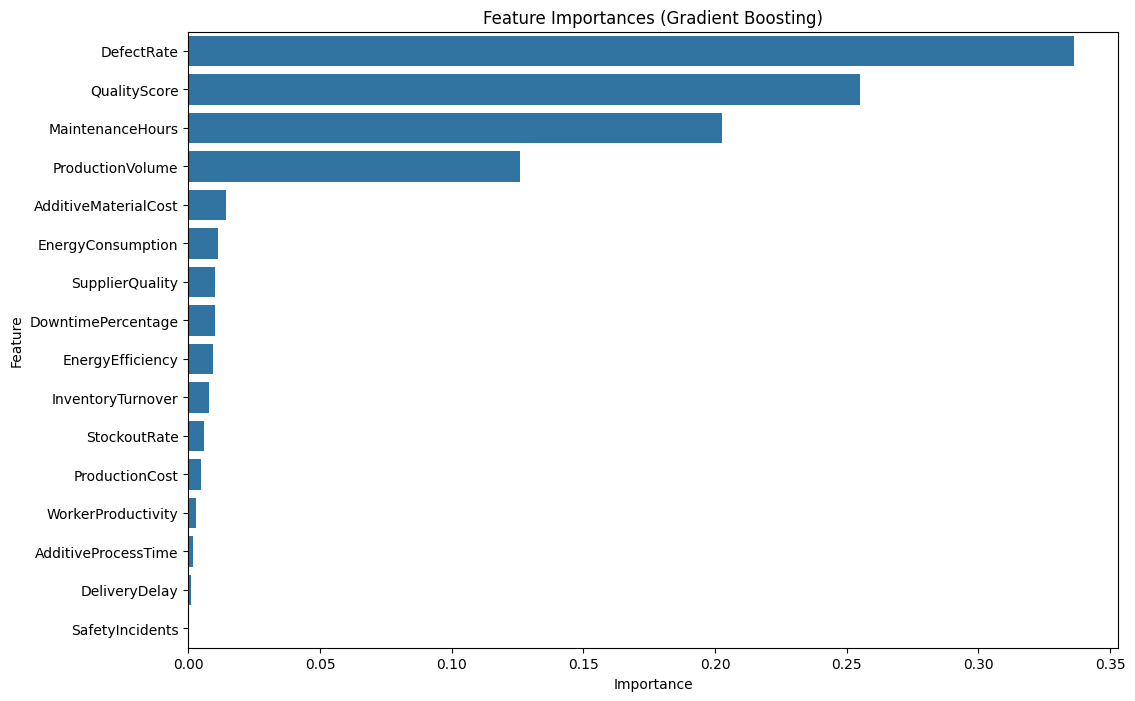

In [ ]:
# feature importances plotting for gradient boosting

# feature importances
importances = gb_classifier.feature_importances_
features = X_train.columns

# Create a DataFrame for easier plotting
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances (Gradient Boosting)')
plt.show()


Random Forest Accuracy: 0.9552469135802469
Logistic Regression Accuracy: 0.8549382716049383
Gradient Boosting Accuracy: 0.9521604938271605

The most accurate model is: Random Forest


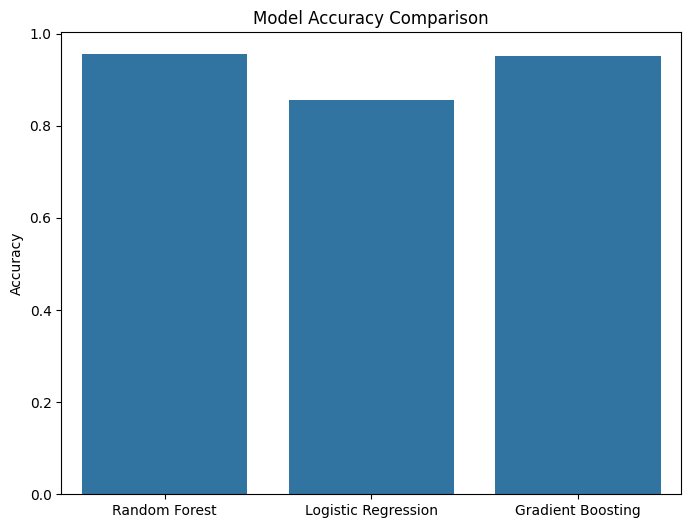

In [ ]:
#COMPARISION OF THE MODELS

rf_accuracy = accuracy_score(y_test, rf_classifier.predict(X_test))
logreg_accuracy = accuracy_score(y_test, logreg.predict(X_test))
gb_accuracy = accuracy_score(y_test, gb_classifier.predict(X_test))


print("Random Forest Accuracy:", rf_accuracy)
print("Logistic Regression Accuracy:", logreg_accuracy)
print("Gradient Boosting Accuracy:", gb_accuracy)

# Determine the best model
best_model = max([("Random Forest", rf_accuracy),
                   ("Logistic Regression", logreg_accuracy),
                   ("Gradient Boosting", gb_accuracy)], key=lambda x: x[1])[0]
print("\nThe most accurate model is:", best_model)

# Visual comparison
models = ['Random Forest', 'Logistic Regression', 'Gradient Boosting']
accuracies = [rf_accuracy, logreg_accuracy, gb_accuracy]

plt.figure(figsize=(8, 6))
sns.barplot(x=models, y=accuracies)
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()


In [ ]:


# Sample new data
new_data = pd.DataFrame({
    'productionvolume': [800, 950, 700, 1100, 1000],
    'productioncost': [12000, 14000, 10000, 16000, 13000],
    'supplierquality': [4, 3, 5, 4, 3],  # Assuming ordinal scale
    'deliverydelay': [2, 0, 3, 1, 2],
    'defectrate': [0.02, 0.01, 0.03, 0.015, 0.025],
    'qualityscore': [90, 85, 92, 88, 91],
    'maintenancehours': [10, 12, 8, 11, 9],
    'downtimepercentage': [0.05, 0.03, 0.06, 0.04, 0.055],
    'inventoryturnover': [6, 5, 7, 6, 5],
    'stockoutrate': [0.01, 0.02, 0.005, 0.015, 0.012],
    'workerproductivity': [85, 90, 80, 88, 87],
    'safetyincidents': [1, 0, 2, 1, 0],
    'energyconsumption': [1500, 1600, 1400, 1700, 1550],
    'energyefficiency': [0.85, 0.88, 0.82, 0.86, 0.87],
    'additiveprocesstime': [20, 22, 18, 21, 19],
    'additivematerialcost': [5000, 5500, 4500, 6000, 5200]
})

# Preprocess the new data (one-hot encoding if necessary)
new_data_encoded = pd.get_dummies(new_data)

# Align columns with training data (handle potential missing columns)
missing_cols = set(X_train.columns) - set(new_data_encoded.columns)
for col in missing_cols:
    new_data_encoded[col] = 0
new_data_encoded = new_data_encoded[X_train.columns]

# Make predictions
new_predictions = rf_classifier.predict(new_data_encoded)

# Display results
print(new_predictions)


[0 1 0 1 1]


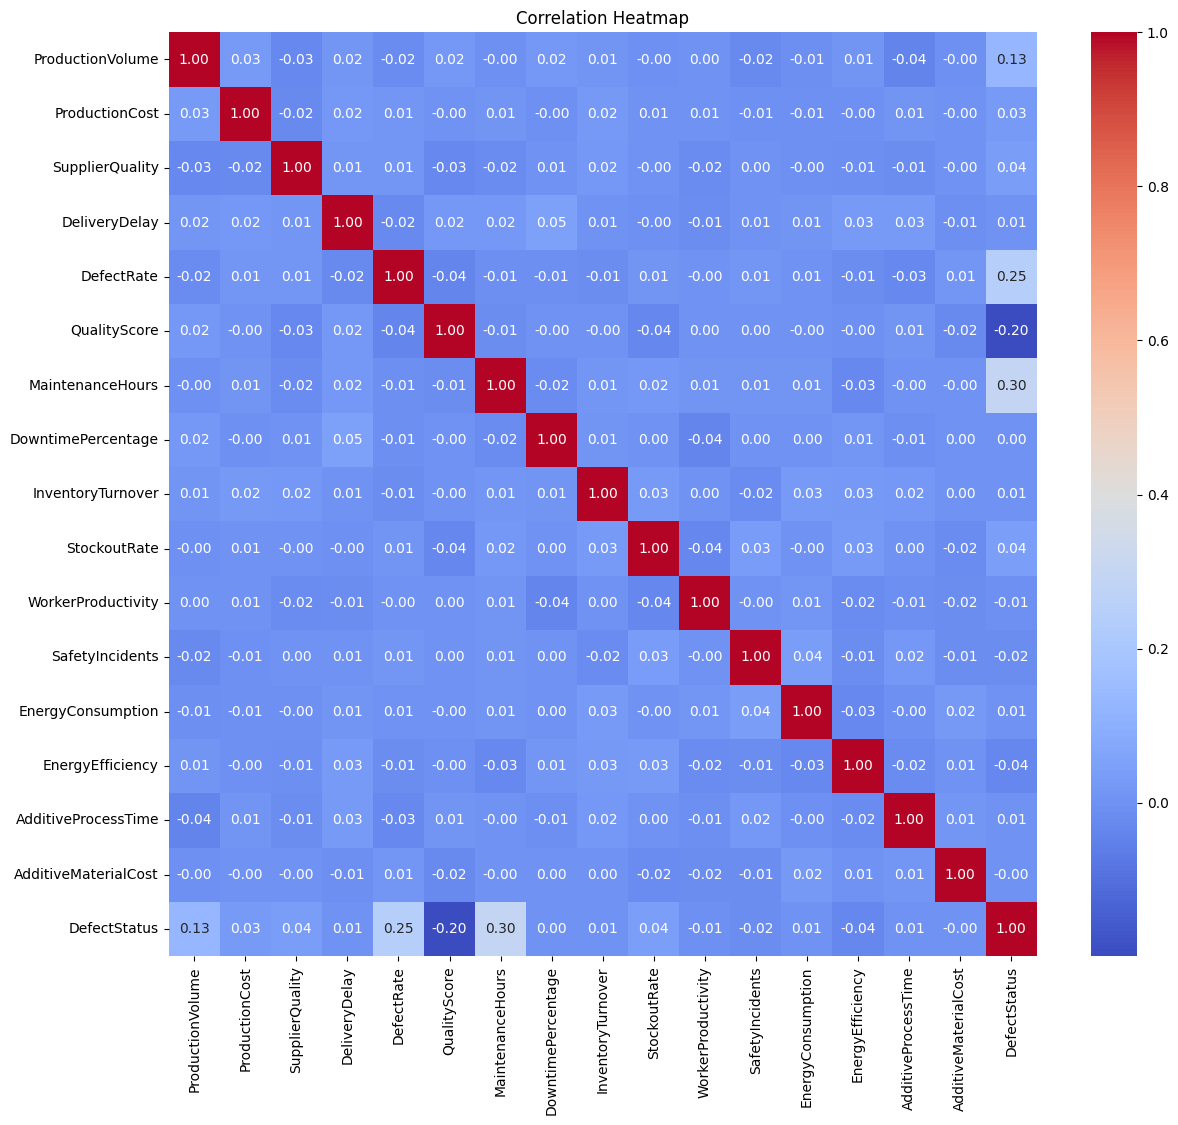

In [ ]:
# Correlation heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

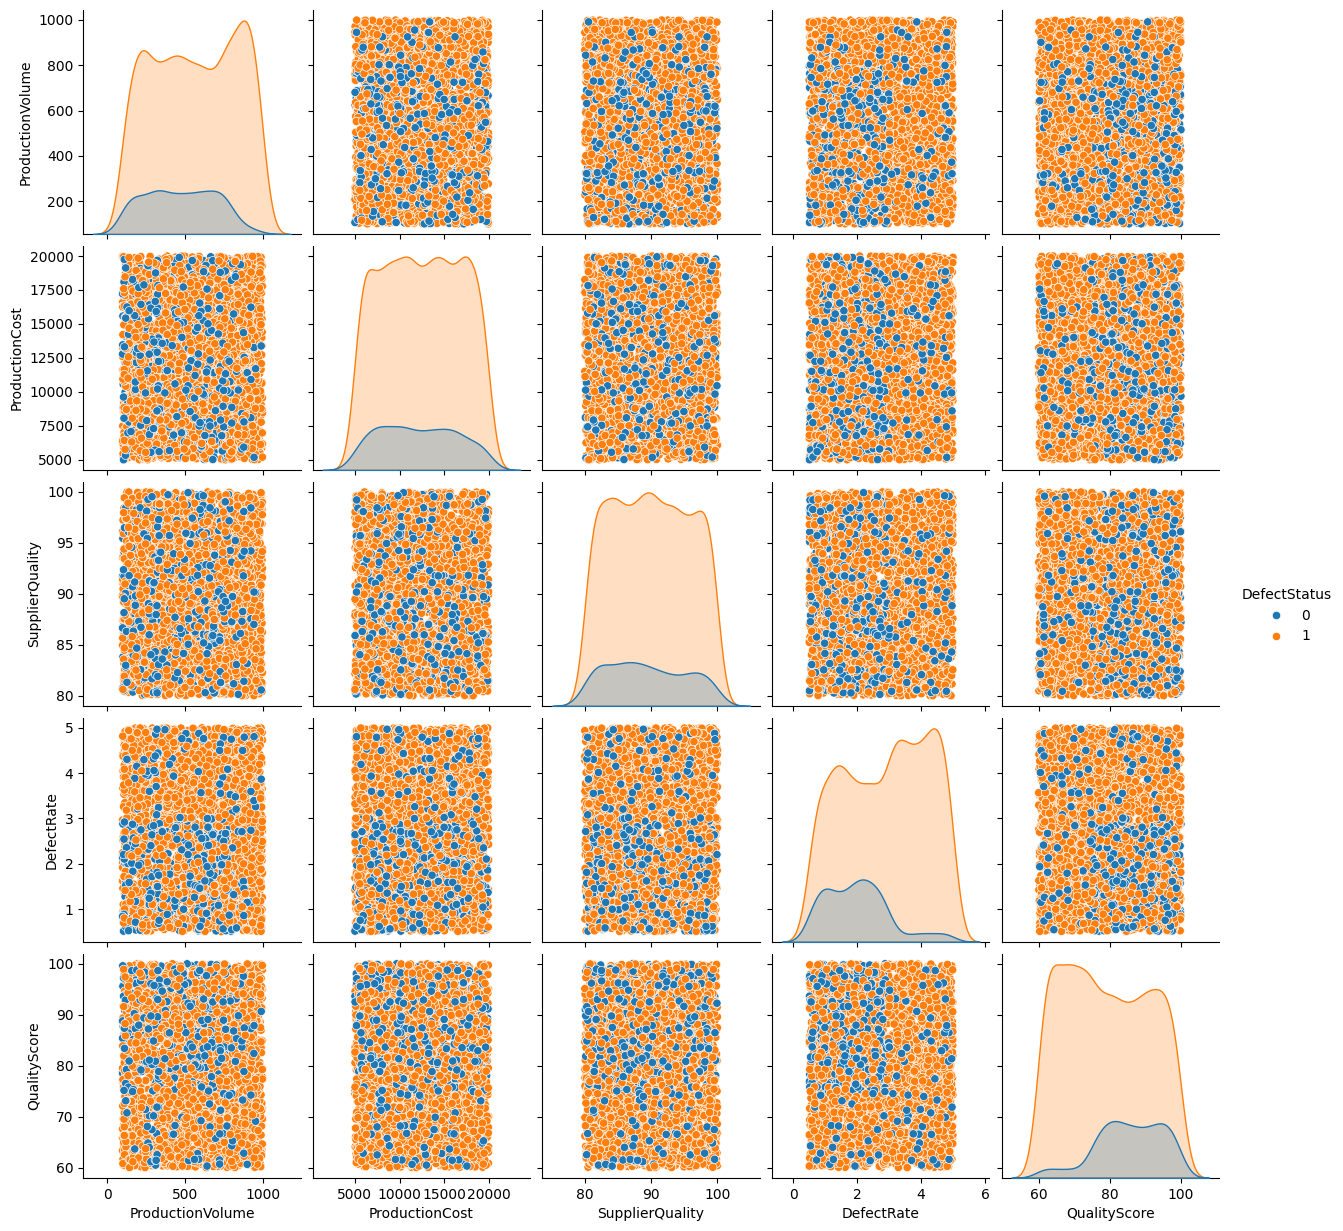

In [ ]:
# Pairplot of selected features
selected_features = ['ProductionVolume', 'ProductionCost', 'SupplierQuality', 'DefectRate', 'QualityScore', 'DefectStatus']
sns.pairplot(df[selected_features], hue='DefectStatus')
plt.show()